In [1]:
using ConvolutionalFactorizations
using Random
using LinearAlgebra
using Plots

include("../datasets/toy.jl")

generate_toy_data (generic function with 1 method)

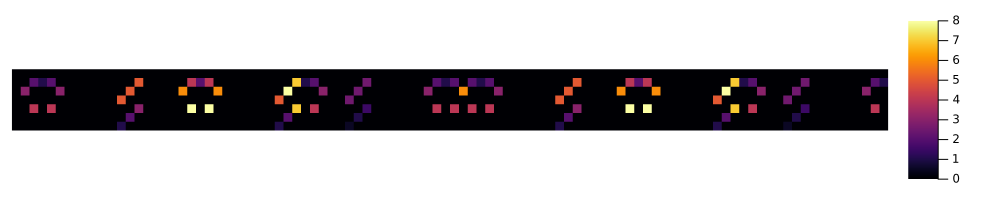

In [2]:
X, W, H = generate_toy_data();
heatmap(X, aspect_ratio=:equal, size=(1000,200), showaxis=false, ticks=false)

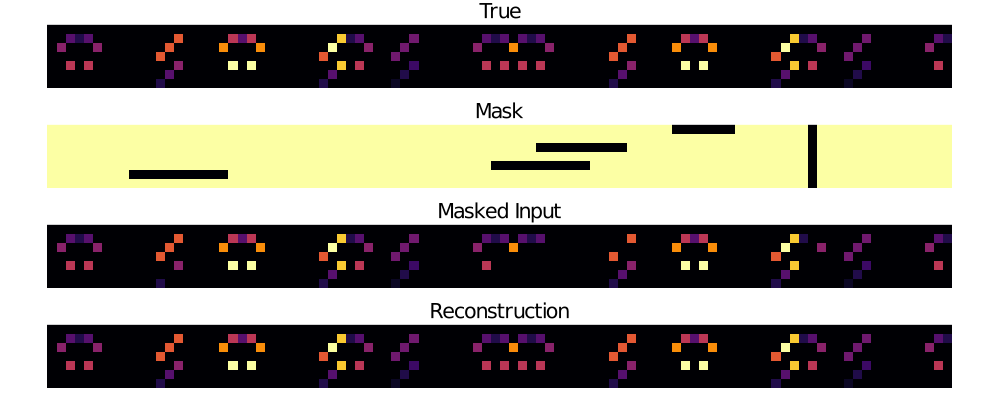

In [12]:
# Let's fit this data using a masked loss.
# Following PPSEQ we'll use a speckled hold-out pattern
mask = ones(size(X))
mask[2, 10:20] .= 0
mask[3, 50:60] .= 0
mask[5, 55:64] .= 0
mask[7, 70:76] .= 0
mask[:, 85] .= 0
loss = MaskedLoss(SquareLoss(), mask)

model = ConvolutionalFactorization(L=5, K=2, loss=loss,
        H_penalizers=[AbsolutePenalty(1.0)], H_constraint=NonnegConstraint(), W_constraint=NonnegConstraint())
(Ŵ,Ĥ), cache, report = fit(model, X .* mask);
est = tensor_conv(Ŵ,Ĥ)

layout = @layout [a; b; c; d]
p1 = heatmap(X, aspect_ratio=:equal, size=(1000,100), showaxis=false, ticks=false, colorbar=false,
    title="True")

p2 = heatmap(mask, aspect_ratio=:equal, size=(1000,100), showaxis=false, ticks=false, colorbar=false,
    title="Mask")

p3 = heatmap(mask .* X, aspect_ratio=:equal, size=(1000,100), showaxis=false, ticks=false, colorbar=false,
    title="Masked Input")

p4 = heatmap(est, aspect_ratio=:equal, size=(1000,100), showaxis=false, ticks=false, colorbar=false,
    title="Reconstruction")


plot(p1, p2, p3, p4, layout=layout, size=(1000,400), fmt=:png)

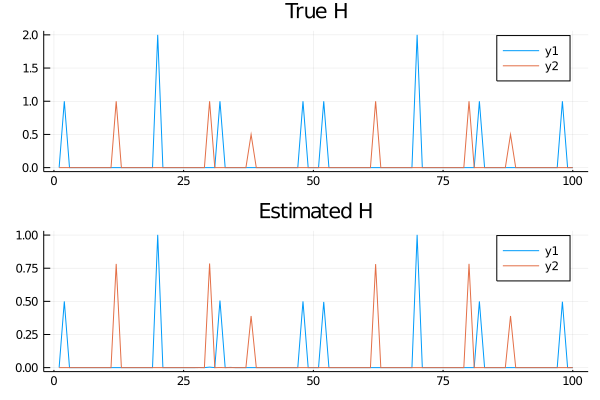

In [11]:
layout = @layout [a; b]
p1 = plot(H', title="True H")
p2 = plot(Ĥ', title="Estimated H")
plot(p1, p2, layout=layout, fmt=:png)